<a href="https://colab.research.google.com/github/tas-anne/Digital-SIgnal-Processing-LabTask/blob/main/Lab_4_190041220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Signal Processing | Lab 4
###ID: 190041220
###Name: Tasfia Tasneem Annesha


importing libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Task 1

Write the two following functions, implementing DFT and Inverse DFT. You should not
use any high-level library functions. Implement it from scratch using simple libraries
such as numpy, math. The algorithms can be found in Tables 8-1 (Page 154) and 8-2
(Page 160). Then, write another function that converts Rectangular representation of a
frequency domain signal into Polar using equations described in chapter 8.

**a.function [ReX,ImX] = myDFT(x)**

The input to the function is x and it returns two vectors: ReX
and ImX.

In [ ]:
import math

In [ ]:
def myDFT(x):
    n = len(x)
    ReX = np.zeros(n//2)
    ImX = np.zeros(n//2)
    
    for k in range(n//2):
        for i in range(n-1):
            ReX[k] = ReX[k] + x[i] * math.cos(2*math.pi*k*i*n)
            ImX[k] = ImX[k] + x[i] * math.sin(2*math.pi*k*i*n)
    
    return ReX, ImX 

In [ ]:
data2 = np.zeros(32)
data2[0] = 32
ReX, ImX = myDFT(data2)

In [ ]:
print(ReX)
print(ImX)

[32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Here the result of the newly created DFT function is verified using numpy's built-in fft function. It is seen that the results match.

In [ ]:
spec_analysis2 = np.fft.rfft(data2)
print(spec_analysis2.real)
print(spec_analysis2.imag)

[32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.]
[ 0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.]


**b.function x = myIDFT(ReX,ImX)**

An inverse DFT implemented using the algorithm refered to in table 8.2 of the book. The function are two vectors: ReX and ImX. It returns
the original signal x.

In [ ]:
def myIDFT(ReX, ImX):
    ReX2 = np.array(ReX)
    ImX2 = np.array(ImX)
    n = len(ReX) * 2
    x = np.zeros(n)
    
    for k in range(n//2):
        ReX2[k] = ReX2[k]/(n//2)
        ImX2[k] = -ImX2[k]/(n//2)
    
    ReX2[0] = ReX2[0]/2
    ReX2[-1] = ReX2[-1]/2
    
    for k in range(n//2):
        for i in range(n-1):
            x[i] = x[i] + ReX2[k] * math.cos(2*math.pi*k*i/n)
            x[i] = x[i] + ImX2[k] * math.sin(2*math.pi*k*i/n)
    return x

In [ ]:
x = myIDFT(ReX, ImX)

In [ ]:
x

array([ 3.00000000e+01,  1.98078528e+00, -1.92387953e+00,  1.83146961e+00,
       -1.70710678e+00,  1.55557023e+00, -1.38268343e+00,  1.19509032e+00,
       -1.00000000e+00,  8.04909678e-01, -6.17316568e-01,  4.44429767e-01,
       -2.92893219e-01,  1.68530388e-01, -7.61204675e-02,  1.92147196e-02,
        0.00000000e+00,  1.92147196e-02, -7.61204675e-02,  1.68530388e-01,
       -2.92893219e-01,  4.44429767e-01, -6.17316568e-01,  8.04909678e-01,
       -1.00000000e+00,  1.19509032e+00, -1.38268343e+00,  1.55557023e+00,
       -1.70710678e+00,  1.83146961e+00, -1.92387953e+00,  0.00000000e+00])

Even though some discrepencies are seen due to slight parallax, the results can be said to be convincingly correct.

<function matplotlib.pyplot.show(close=None, block=None)>

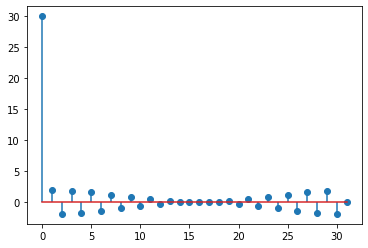

In [ ]:
plt.stem(x)
plt.show

**c.function [MagX, PhaseX] = Rect2Polar(ReX, ImX)**

In [ ]:
def Rect2Polar(ReX, ImX):
    MagX = np.sqrt(ReX**2 + ImX**2)
    PhaseX = np.arctan(ImX, ReX)
    return MagX, PhaseX

In [ ]:
xx = Rect2Polar(ReX, ImX)

In [ ]:
print(xx)

(array([32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32.,
       32., 32., 32.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))


#Task 2

a. The given audio file Lab 4.wav is a recording of a tuning fork ringing. Tuning forks
have a particular frequency. Plot the signal from the given audio file. Then, do spectral
analysis on the signal to find out what was the frequency of the tuning fork. For, spectral
analysis use numpy.fft.rfft function. One way to read the audio file is as follows -

In [ ]:
!gdown 1QpbMIJJicE9w2CVTS0N8Nb5eNfeozTXK 

Downloading...
From: https://drive.google.com/uc?id=1QpbMIJJicE9w2CVTS0N8Nb5eNfeozTXK
To: /content/Lab 4.wav
100% 374k/374k [00:00<00:00, 54.5MB/s]


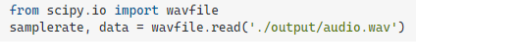

Here, the first task was to separate the sample rate from the data in the provided audio file. Scipy was used to complete this. The data was then subjected to a spectral analysis using numpy's fft.rfft() function. This provides us with the ReX and ImX values in x+iy format. We can use the respective prefixes  .real and .imag to identify the distinct real and imaginary components of the signal. These values allow us to calculate MagX. The natural frequency of the tuning fork can be calculated by taking the argmax of the MagX vector, multiplying it by the sample rate, and then dividing the result by the square of this vector's length.


In [ ]:
from scipy.io import wavfile
samplerate, data = wavfile.read("Lab 4.wav")

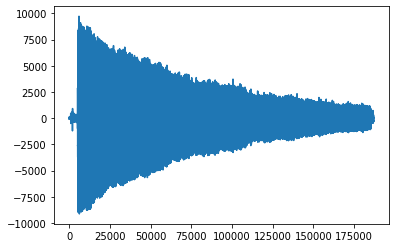

In [ ]:
plt.plot(data)
plt.show()

In [ ]:
spec_analysis = np.fft.rfft(data)

In [ ]:
spec_analysis

array([ 1.81931000e+06    +0.j        ,  1.96689250e+04 +4267.62614863j,
       -8.05149872e+03+47487.38439454j, ...,
        2.53283597e+01   +77.82165577j, -3.99232504e+00   -58.46531383j,
        2.60000000e+01    +0.j        ])

In [ ]:
ReX = spec_analysis.real
ImX = -spec_analysis.imag

In [ ]:
ReX

array([ 1.81931000e+06,  1.96689250e+04, -8.05149872e+03, ...,
        2.53283597e+01, -3.99232504e+00,  2.60000000e+01])

In [ ]:
ImX

array([    -0.        ,  -4267.62614863, -47487.38439454, ...,
          -77.82165577,     58.46531383,     -0.        ])

In [ ]:
MgX = np.sqrt(ReX**2 + ImX**2)

In [ ]:
MgX

array([1.81931000e+06, 2.01265806e+04, 4.81651151e+04, ...,
       8.18396964e+01, 5.86014640e+01, 2.60000000e+01])

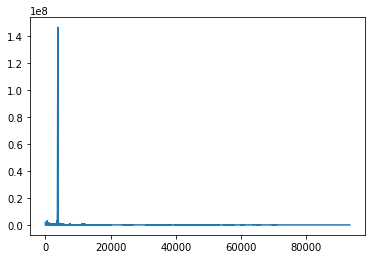

In [ ]:
plt.plot(MgX)
plt.show()

In [ ]:
freq = np.argmax(MgX)
print(f'''The frequency of the tuning fork is:
            {(freq * samplerate)/(len(MgX)*2)} Hz''')

The frequency of the tuning fork is:
            447.07426314775574 Hz


#**Task 2b**

b. To get a clean spectrum, you can first multiply the time domain signal with a
hamming window using the function numpy.hamming. To make the spectrum signal
smoother, you can take multiple time-domain signal chunks, then find each of their
spectrum and then average them. These tricks can be found in detail in chapter 9.

Non-averaged natural frequency: 447.07426314775574
Averaged natural frequency: 423.7176922809385


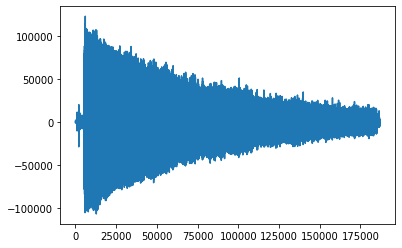

In [ ]:
def frequency(data):
  spectral_analysis = np.fft.rfft(data)
  ReX = spectral_analysis.real
  ImX = spectral_analysis.imag
  MagX, PhaseX = Rect2Polar(ReX, ImX)
  return np.argmax(MagX) * samplerate / (len(MagX) * 2)

print(f"Non-averaged natural frequency: {frequency(data)}")

hamming_window_length = 50
hamming = np.hamming(hamming_window_length)
smoothed_data = np.convolve(data, hamming)
plt.plot(smoothed_data)

natural_frequency = 0
iterations = 0
chunk_range = 100

for i in range(0, len(smoothed_data) - chunk_range + 1, chunk_range):
  chunk = data[i : i + chunk_range + 1]
  natural_frequency += frequency(chunk)
  iterations += 1

natural_frequency /= iterations
print(f"Averaged natural frequency: {natural_frequency}")


Taking multiple time-domain signal chunks, finding their individual spectra, and then averaging them can also help to smooth out the frequency domain representation and reduce the impact of noise and other transient effects. This is often referred to as spectral averaging or power spectral density estimation, and it can be particularly useful when analyzing non-stationary signals that change over time

#Task 3


As DFT is $O(n^2)$, given the data points size, it does not run fast enough to verify this function.Takes too much time for the myDFT function to execute

In [ ]:
 #ReX, ImX = myDFT(data) 
 #MagX, PhaseX = Rect2Polar(MagX, PhaseX)
 #plt.plot(MagX)
 #print(f'Natural Frequency: {np.argmax(MagX) * samplerate / (len(MagX) * 2)} Hz')

#Task 4

<StemContainer object of 3 artists>

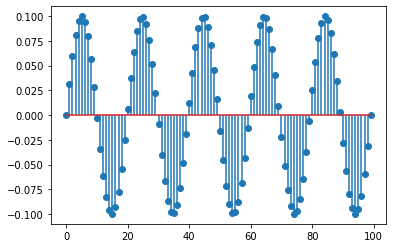

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

freq=1
amplitude=0.1
t=np.linspace(0,5,100)
wave=amplitude*np.sin(2*np.pi*freq*t)
plt.stem(wave)

The np.random.uniform() function generates a random signal .

<StemContainer object of 3 artists>

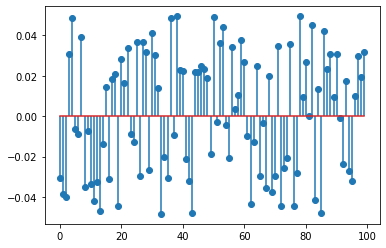

In [ ]:
noise = np.random.uniform(low=-0.05, high=0.05, size=len(wave))
plt.stem(noise)

We then add the noise to the original signal to get the final noisy signal.

<StemContainer object of 3 artists>

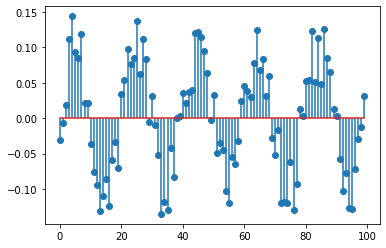

In [ ]:
noisy_signal = noise + wave
plt.stem(noisy_signal)

We're also generating a moving average filter by creating an array of length 15 and then dividing the array by the filter length to get the average value.

We're then convolving the filter with the noisy signal using np.convolve

<StemContainer object of 3 artists>

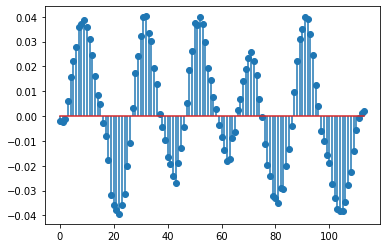

In [ ]:
averaging_filter = [1/15] * 15
filtered_output = np.convolve(noisy_signal, averaging_filter)

plt.stem(filtered_output)

In [ ]:
def OutputSideConvolution(S, H):
    output = np.zeros(len(S) + len(H) - 1)
    for i in range(0, len(output)):
        for j in reversed(range(len(H))):
            if i-j>=0 and i-j<len(S):
                output[i] += (S[i - j] * H[j])
    return output

 the filtered signals using both np.convolve and the custom convolution function are very similar, and effectively remove most of the noise from the original signal.

<StemContainer object of 3 artists>

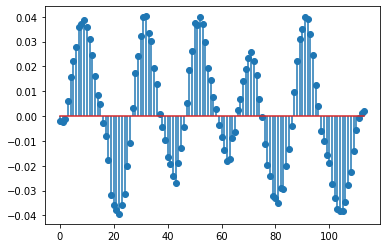

In [ ]:
custom_filtered_output = OutputSideConvolution(noisy_signal, averaging_filter)
plt.stem(custom_filtered_output)